In [82]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout, BatchNormalization
from keras import backend as K
from keras.utils.np_utils import to_categorical
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.mixture import GaussianMixture

In [83]:
df=pd.read_csv('/content/train_data.csv',sep=',')

In [84]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [85]:
df.shape

(227845, 31)

In [86]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


**Week 1**

Exploratory Data Analysis (EDA):

In [87]:
# 1. Perform an EDA on the Dataset.

In [88]:
# A) Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [89]:
# B) Find if there is any connection between Time, Amount, and the transaction being fraudulent.

print(df.groupby('Class').agg({'Time':'mean'}))
print(df.groupby('Class').agg({'Amount':'mean'}))

               Time
Class              
0      94778.158337
1      80144.459391
           Amount
Class            
0       88.455144
1      127.306523


I) It can be observed that the time and amount varies according to the transaction being fraudulant or non-fraudulant

II) Lesser the time is, more is the possibility of transaction to be fraudulant and more the amount is more is the risk of fraudulant transaction

In [90]:
# 2. Check the class count for each class. It’s a class Imbalance problem.

print(df['Class'].value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [91]:
# The class is imbalanced

In [92]:
# 3. Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

In [93]:
y = df['Class']
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

X = pd.concat([X_train, y_train], axis=1)

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

fraud_upsampled = resample(fraud,
                          replace=True, 
                          n_samples=len(not_fraud), 
                          random_state=27)

upsampled = pd.concat([not_fraud, fraud_upsampled])

upsampled.Class.value_counts()

0    170590
1    170590
Name: Class, dtype: int64

In [94]:
# 4. Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_scor(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
    

Modeling Techniques:

In [95]:
# 5. Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best

y_train = upsampled['Class']
X_train = upsampled.drop('Class',axis=1)

lr = LogisticRegression()
naive = GaussianNB()
svm = LinearSVC(random_state=0, tol=1e-5)

classifier = [lr,naive, svm]
classifier_label = ['logistic', 'naive_gaussian', 'svm']

for i in range(3):
    upsampled = classifier[i].fit(X_train, y_train)
    upsampled_pred = upsampled.predict(X_test)
    print('The F1 score of {} is {} '.format(classifier_label[i],f1_score(y_test, upsampled_pred)))



The F1 score of logistic is 0.08245533669262484 
The F1 score of naive_gaussian is 0.20461095100864551 
The F1 score of svm is 0.07490974729241877 


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


According to the above results naive bayes is the best classifier

In [96]:
# 6. Use different Tree-based classifiers like Random Forest and XGBoost. 

y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("random forest F1 score is", f1_score(y_test, rfc_pred))

random forest F1 score is 0.8602150537634408


In [97]:
y_train.unique()

array([0, 1])

In [98]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth':15,'eta':1,'objective':'binary:logistic'}
num_round = 2
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
y_pred = (preds > 0.5)
print("xgboost F1 score is", f1_score(y_test, y_pred))

xgboost F1 score is 0.8478260869565218


According to the F1 score, XGBoost gives better accuracy

**Project Task: Week 2**

Applying ANN:

In [99]:
# 1. Use ANN (Artificial Neural Network) to predict Store Sales.

model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               3100      
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,401
Trainable params: 23,401
Non-trainable params: 0
_________________________________________________________________
None


In [100]:
loss = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score= model.evaluate(X_test, y_test, verbose=0)
print("score=", score)


Epoch 1/5
668/668 [==============================] - 4s 5ms/step - loss: 34.9758 - accuracy: 0.9910 - val_loss: 90.4564 - val_accuracy: 0.9982
Epoch 2/5
668/668 [==============================] - 3s 4ms/step - loss: 38.7621 - accuracy: 0.9969 - val_loss: 0.3995 - val_accuracy: 0.9980
Epoch 3/5
668/668 [==============================] - 3s 4ms/step - loss: 58.8683 - accuracy: 0.9924 - val_loss: 128.9824 - val_accuracy: 0.9982
Epoch 4/5
668/668 [==============================] - 3s 4ms/step - loss: 148.6892 - accuracy: 0.9924 - val_loss: 214.6380 - val_accuracy: 0.9982
Epoch 5/5
668/668 [==============================] - 3s 4ms/step - loss: 118.2145 - accuracy: 0.9954 - val_loss: 82.9145 - val_accuracy: 0.9982
score= [75.99324035644531, 0.9982268810272217]


In [101]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

count_classes = y_test1.shape[1]
print(count_classes)

2


In [102]:
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_scor])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               3100      
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 dense_42 (Dense)            (None, 100)               10100     
                                                                 
 dense_43 (Dense)            (None, 2)                 202       
                                                                 
Total params: 23,502
Trainable params: 23,502
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
loss = model.fit(X_train, y_train1, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score = model.evaluate(X_test, y_test1, verbose=0)
print("score=", score)

Epoch 1/5
668/668 [==============================] - 3s 4ms/step - loss: 31.9414 - accuracy: 0.9939 - f1_scor: 0.9939 - val_loss: 14.2170 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 2/5
668/668 [==============================] - 3s 4ms/step - loss: 41.7230 - accuracy: 0.9922 - f1_scor: 0.9922 - val_loss: 147.3152 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 3/5
668/668 [==============================] - 2s 4ms/step - loss: 82.7063 - accuracy: 0.9965 - f1_scor: 0.9965 - val_loss: 68.2147 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 4/5
668/668 [==============================] - 3s 4ms/step - loss: 29.7861 - accuracy: 0.9967 - f1_scor: 0.9967 - val_loss: 0.7109 - val_accuracy: 0.9969 - val_f1_scor: 0.9969
Epoch 5/5
668/668 [==============================] - 3s 4ms/step - loss: 51.0647 - accuracy: 0.9951 - f1_scor: 0.9951 - val_loss: 93.0757 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
score= [85.4771957397461, 0.9982268810272217, 0.9982278347015381]


ANN model performed better than ML models

In [104]:
# 2. Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above.

model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_scor])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 100)               3100      
                                                                 
 dense_45 (Dense)            (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_46 (Dense)            (None, 100)               10100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_47 (Dense)            (None, 2)                 202       
                                                                 
Total params: 23,502
Trainable params: 23,502
Non-tra

In [105]:
loss = model.fit(X_train, y_train1, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score = model.evaluate(X_test, y_test1, verbose=0)
print("score=", score)

Epoch 1/5
668/668 [==============================] - 3s 4ms/step - loss: 26.2438 - accuracy: 0.9955 - f1_scor: 0.9955 - val_loss: 3.5990 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 2/5
668/668 [==============================] - 3s 5ms/step - loss: 2.0826 - accuracy: 0.9962 - f1_scor: 0.9962 - val_loss: 0.1474 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 3/5
668/668 [==============================] - 3s 5ms/step - loss: 0.0699 - accuracy: 0.9979 - f1_scor: 0.9979 - val_loss: 0.0151 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 4/5
668/668 [==============================] - 3s 4ms/step - loss: 0.0133 - accuracy: 0.9984 - f1_scor: 0.9984 - val_loss: 0.0145 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 5/5
668/668 [==============================] - 3s 4ms/step - loss: 0.0121 - accuracy: 0.9984 - f1_scor: 0.9984 - val_loss: 0.0147 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
score= [0.013006494380533695, 0.9982268810272217, 0.9982278347015381]


loss is reduced after using dropouts

In [106]:
# 4. Implement anomaly detection algorithms.

gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0 )
y = df.Class
X = df.drop('Class', axis=1)
gm.fit(X_train)

GaussianMixture(n_components=2, random_state=0)

In [107]:
score=gm.predict_proba(X_train)
score

array([[1.00380848e-019, 1.00000000e+000],
       [1.00000000e+000, 2.51027158e-223],
       [2.02837752e-015, 1.00000000e+000],
       ...,
       [1.00000000e+000, 1.20436296e-051],
       [7.49027556e-016, 1.00000000e+000],
       [1.00000000e+000, 3.10877838e-078]])

In [108]:
score1=[score[i][0] for i in range(X_train.shape[0])]
score2=[score[i][1] for i in range(X_train.shape[0])]

In [109]:
df2=X_train
df2['class']=y_train
df2['score1']=score1
df2['score2']=score2
not_fraud = df2[df2['class']==0]
fraud = df2[df2['class']==1]

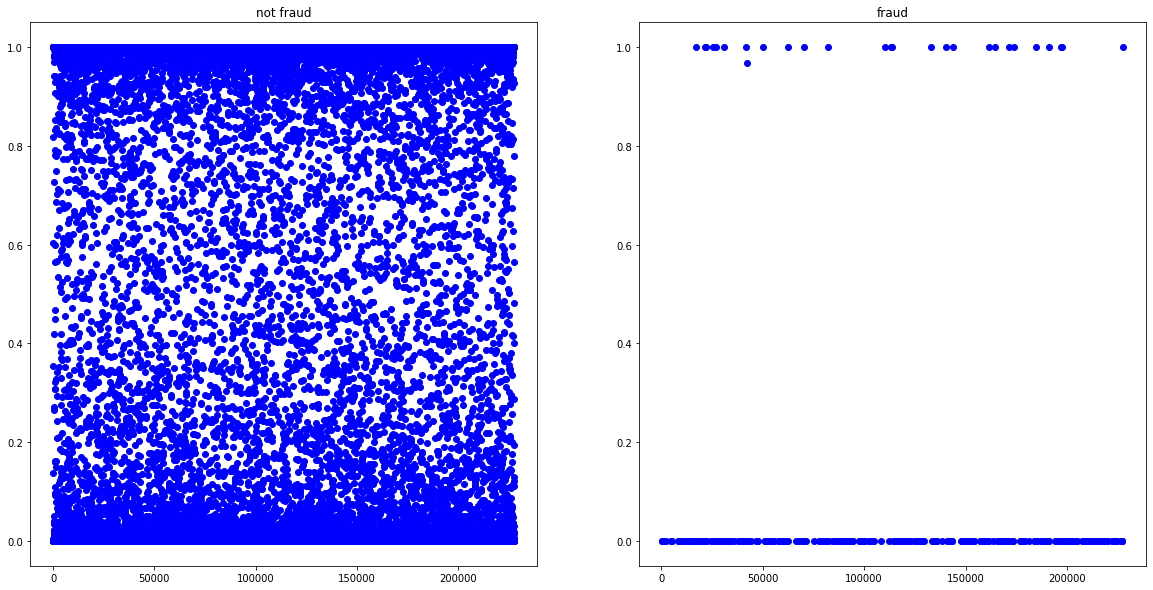

In [110]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=25)
plt.subplot(1,2,1)
plt.title('probability for observation to be drawing from the first gaussian')
plt.plot(not_fraud.score1,'bo')
plt.title('not fraud')
plt.subplot(1,2,2)
plt.plot(fraud.score1,'bo')
plt.title('fraud')
plt.show()

In [111]:
threshold1 = np.percentile(score1, 1)
threshold1

9.234769091808122e-21

In [112]:
#
score=score1<threshold1
X_train['score']=score
print('We can add the score variable as a feature in order to see whether the capability of our models get improved')

We can add the score variable as a feature in order to see whether the capability of our models get improved


In [113]:
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_scor])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               3500      
                                                                 
 dense_49 (Dense)            (None, 100)               10100     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_51 (Dense)            (None, 2)                 202       
                                                                 
Total params: 23,902
Trainable params: 23,902
Non-tra

In [114]:
y_train2 = to_categorical(y_train1)
y_test2 = to_categorical(y_test1)
loss = model.fit(X_train, y_train2, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score = model.evaluate(X_test, y_test2, verbose=0)
print("score=", score)

score= [0.02435659032036, 0.99234560272217, 0.99822783123456]

F1 Score does not improve any better